In [47]:
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.pipeline import FeatureUnion
import seaborn as sns

In [22]:
ds = make_regression(n_samples=100,n_targets=1,n_features=2)

In [23]:
ds[0][:,0]

array([ 4.02159430e-01,  2.17591791e-02, -2.66415637e-02, -9.02647971e-01,
        1.54033462e+00,  1.25442048e-01,  8.90818776e-01,  1.21781143e+00,
        2.29659796e-01,  7.80185681e-01, -2.42227274e-01, -1.33257517e+00,
        2.19951280e-01,  3.43644490e-01,  7.35519478e-02,  5.11097406e-01,
        7.86918407e-01,  1.87960810e+00,  2.74552127e-01,  1.24569438e-01,
        6.84606176e-01, -1.06670767e+00,  1.03101200e+00,  8.46741108e-01,
       -1.45994345e-02, -7.04283924e-01,  9.42816435e-01, -6.84589632e-01,
       -1.94702789e-01, -6.88684386e-01, -2.39592650e+00,  8.29441748e-01,
        2.42287245e-01,  1.35251758e-01,  3.10797124e-01,  4.64451235e-01,
        7.42926798e-02, -7.53452355e-01, -6.01733323e-01,  1.79663278e+00,
        9.52940838e-02,  2.93785101e-01, -1.86169782e-01,  6.41632171e-01,
       -1.53421562e+00,  1.15231788e-01,  5.82159768e-01, -7.59446100e-01,
       -1.00657560e+00, -1.13214004e+00, -9.23187074e-01, -1.40664477e+00,
        1.54447256e+00, -

In [24]:
df = pd.DataFrame({'A':list(ds[0][:,0]),'B':list(ds[0][:,1]),'Y':list(ds[1])})
df.head()

,A,B,Y
0,0.402159,0.507931,53.064925
1,0.021759,0.222165,10.147773
2,-0.026642,-1.022875,-40.489518
3,-0.902648,-0.649848,-100.782045
4,1.540335,-0.918463,96.202804


In [25]:
X = df[['A','B']]
y = df['Y']

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score,accuracy_score,mean_squared_error

In [27]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [28]:
pipe = Pipeline([('min',MinMaxScaler()),('lr',LinearRegression())],verbose=True)

In [29]:
pipe.fit(x_train,y_train)

[Pipeline] ............... (step 1 of 2) Processing min, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing lr, total=   0.0s


Pipeline(steps=[('min', MinMaxScaler()), ('lr', LinearRegression())],
         verbose=True)

In [30]:
pipe2 = Pipeline([('standard',MinMaxScaler())],verbose=True)

In [31]:
x_test = pipe2.fit_transform(x_test)

[Pipeline] .......... (step 1 of 1) Processing standard, total=   0.0s


In [32]:
x_test

array([[0.47356419, 0.64110559],
       [0.47243108, 0.79219431],
       [0.45284977, 0.87364098],
       [0.96927858, 0.25376285],
       [0.70043216, 0.85259453],
       [0.7389796 , 0.95955905],
       [0.85245049, 0.57119382],
       [0.61148782, 0.55431081],
       [0.64538347, 0.        ],
       [0.85559614, 0.31569668],
       [1.        , 0.31988798],
       [0.66309825, 0.8502843 ],
       [0.2709948 , 0.78379935],
       [0.72387036, 0.387191  ],
       [0.16325632, 0.58230032],
       [0.66902629, 0.62517169],
       [0.38446366, 0.36401065],
       [0.63373117, 0.42229563],
       [0.86788141, 0.44957768],
       [0.68356345, 0.48857085],
       [0.72655692, 0.1722997 ],
       [0.        , 0.6024868 ],
       [0.76725532, 0.58281207],
       [0.40753908, 0.54948709],
       [0.6977176 , 0.67078793],
       [0.40856783, 0.89328841],
       [0.72517723, 0.54554363],
       [0.55276032, 0.53101291],
       [0.74430179, 0.37535497],
       [0.6948922 , 1.        ]])

In [33]:
pred = pipe.predict(x_test)

In [34]:
mean_squared_error(y_test,pred)

10549.706575017057

In [35]:
pipe.get_params()

{'memory': None,
 'steps': [('min', MinMaxScaler()), ('lr', LinearRegression())],
 'verbose': True,
 'min': MinMaxScaler(),
 'lr': LinearRegression(),
 'min__clip': False,
 'min__copy': True,
 'min__feature_range': (0, 1),
 'lr__copy_X': True,
 'lr__fit_intercept': True,
 'lr__n_jobs': None,
 'lr__normalize': False,
 'lr__positive': False}

In [36]:
pipe.named_steps

{'min': MinMaxScaler(), 'lr': LinearRegression()}

In [37]:
pipe2.named_steps

{'standard': MinMaxScaler()}

<AxesSubplot:xlabel='Y', ylabel='Density'>

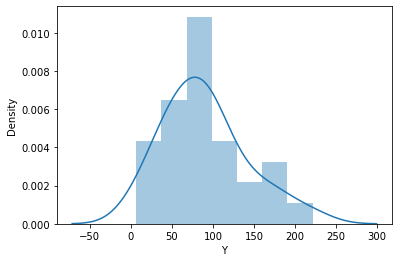

In [45]:
sns.distplot(pred-y_test)

In [63]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(url, names=names)

In [61]:

X = array[:,0:8]
Y = array[:,8]

100